In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
bechdel_imdb = pd.read_csv('Bechdel plus IMDB.csv')
print('Bechdel with IMDB Ratings')
print(bechdel_imdb.head())
print(bechdel_imdb.info())
bechdel_imdb_budget = pd.read_csv('Bechdel with IMDB and Budget.csv')
print('Bechdel with Ratings and Budget')
print(bechdel_imdb_budget.head())
print(bechdel_imdb_budget.info())

Bechdel with IMDB Ratings
              bechdel.title   imdbid  bechdel_binary bechdel_test  \
0            Only the Brave  3829920               0         FAIL   
1               Sand Castle  2582576               0         FAIL   
2      Beauty and the Beast  2771200               1         PASS   
3      Disaster Artist, The  3521126               1         PASS   
4  Dance Academy: The Movie  5834660               1         PASS   

   2_named_women  talk_to_each_other  not_about_men  rating  year     genre1  \
0           True                True          False       2  2017     Action   
1          False               False          False       0  2017     Action   
2           True                True           True       3  2017     Family   
3           True                True           True       3  2017  Biography   
4           True                True           True       3  2017      Drama   

   ... females_18age_avg_vote females_18age_votes  females_30age_avg_vote  \
0

<b>Correlation of Variables</b>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'bechdel_binary'),
  Text(1.5, 0, 'year'),
  Text(2.5, 0, 'mean_vote'),
  Text(3.5, 0, 'males_allages_avg_vote'),
  Text(4.5, 0, 'males_0age_avg_vote'),
  Text(5.5, 0, 'males_18age_avg_vote'),
  Text(6.5, 0, 'males_30age_avg_vote'),
  Text(7.5, 0, 'males_45age_avg_vote'),
  Text(8.5, 0, 'females_allages_avg_vote'),
  Text(9.5, 0, 'females_0age_avg_vote'),
  Text(10.5, 0, 'females_18age_avg_vote'),
  Text(11.5, 0, 'females_30age_avg_vote'),
  Text(12.5, 0, 'females_45age_avg_vote')])

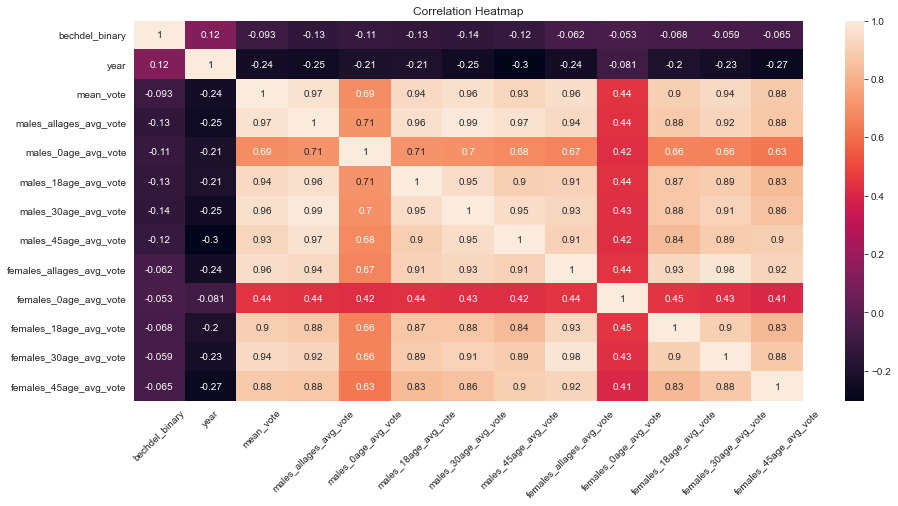

In [3]:
corr_var = bechdel_imdb[['bechdel_binary', 'year','mean_vote', 'males_allages_avg_vote', 'males_0age_avg_vote',
                         'males_18age_avg_vote', 'males_30age_avg_vote', 'males_45age_avg_vote', 
                         'females_allages_avg_vote', 'females_0age_avg_vote', 'females_18age_avg_vote', 
                         'females_30age_avg_vote', 'females_45age_avg_vote']]
                                
bechdel_corr = corr_var.corr()
plt.figure(figsize=(15,7))
sns.heatmap(bechdel_corr, annot=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)

<p>Running a correlation between relevant variables reveals no significant correlation between viewer ratings and pass/fail rate. 'Bechdel Binary' is a numeric pass/fail rating where a "1" is a pass and a "0" is a fail. There is a slight positive correlation between year and pass rate, which makes sense as we know that the pass rate is higher in more recent years. Also interesting is that there is a slight negative correlation between male viewer ratings and the Bechdel pass rate, suggesting that men are slightly less likely to rate movies that pass highly. The correlation is remarkably consistant across all age groups. Women do not have such a correlation. Also interesting is that the average rating of females under 18 has a much lower correlation with the other agre groups.</p>

<b>Trends in IMDB Ratings by Gender</b>
<p>Are there significant differences in user ratings by gender for films that pass or fail the Bechdel Test?</p>

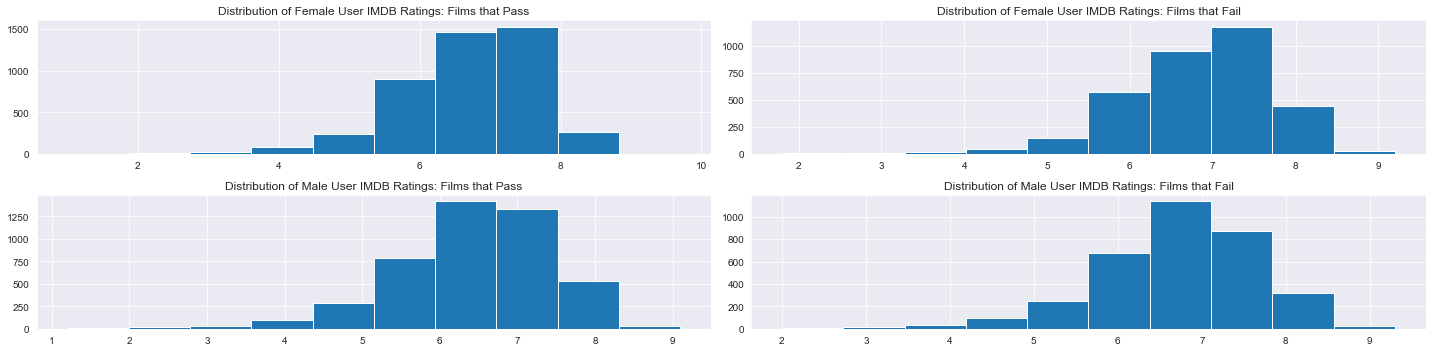

In [4]:
bechdel_fail_imdb = bechdel_imdb[bechdel_imdb["bechdel_test"] == "FAIL"]
bechdel_pass_imdb = bechdel_imdb[bechdel_imdb["bechdel_test"] == "PASS"]

fig, axs = plt.subplots(2,2)
axs[0,0].hist('females_allages_avg_vote', data= bechdel_pass_imdb)
axs[0,0].set_title('Distribution of Female User IMDB Ratings: Films that Pass')
axs[0,1].hist('females_allages_avg_vote', data= bechdel_fail_imdb)
axs[0,1].set_title('Distribution of Female User IMDB Ratings: Films that Fail')
axs[1,0].hist('males_allages_avg_vote', data= bechdel_pass_imdb)
axs[1,0].set_title('Distribution of Male User IMDB Ratings: Films that Pass')
axs[1,1].hist('males_allages_avg_vote', data= bechdel_fail_imdb)
axs[1,1].set_title('Distribution of Male User IMDB Ratings: Films that Fail')
plt.tight_layout()
plt.show()

Across all age groups men give slightly higher ratings to films that fail the Bechdel Test while women's ratings are approximately equal for passing and failing films. 

In [5]:
print('Mean Score Films that Fail Bechdel: Women')
print(bechdel_fail_imdb['females_allages_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Women')
print(bechdel_pass_imdb['females_allages_avg_vote'].median())
print('Mean Score Films that Fail Bechdel: Men')
print(bechdel_fail_imdb['males_allages_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Men')
print(bechdel_fail_imdb['males_allages_avg_vote'].median())


Mean Score Films that Fail Bechdel: Women
6.9
Mean Score Films that Pass Bechdel: Women
6.8
Mean Score Films that Fail Bechdel: Men
6.8
Mean Score Films that Pass Bechdel: Men
6.8


Average scores overall would seem to suggest that this is true! Now let's break it down by age group to see if there are significant differences by age of viewer and gender. 

<b>IMDB Rating Trends by Age and Gender:
<p>Viewers Under 18</p></b>

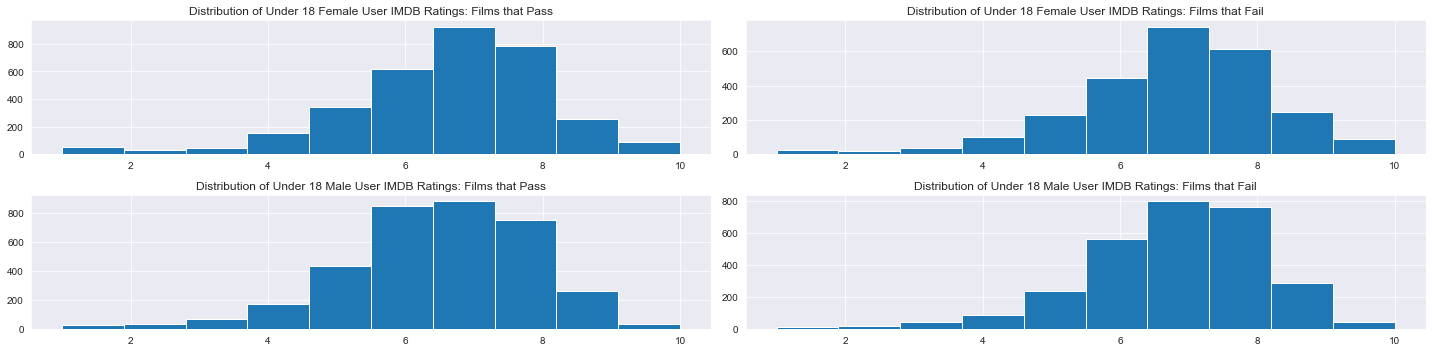

In [6]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist('females_0age_avg_vote', data= bechdel_pass_imdb)
axs[0,0].set_title('Distribution of Under 18 Female User IMDB Ratings: Films that Pass')
axs[0,1].hist('females_0age_avg_vote', data= bechdel_fail_imdb)
axs[0,1].set_title('Distribution of Under 18 Female User IMDB Ratings: Films that Fail')
axs[1,0].hist('males_0age_avg_vote', data= bechdel_pass_imdb)
axs[1,0].set_title('Distribution of Under 18 Male User IMDB Ratings: Films that Pass')
axs[1,1].hist('males_0age_avg_vote', data= bechdel_fail_imdb)
axs[1,1].set_title('Distribution of Under 18 Male User IMDB Ratings: Films that Fail')
plt.tight_layout()
plt.show()

In [7]:
print('Mean Score Films that Fail Bechdel: Women Under 18')
print(bechdel_fail_imdb['females_0age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Women Under 18')
print(bechdel_pass_imdb['females_0age_avg_vote'].median())
print('Mean Score Films that Fail Bechdel: Men Under 18')
print(bechdel_fail_imdb['males_0age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Men Under 18')
print(bechdel_fail_imdb['males_0age_avg_vote'].median())

Mean Score Films that Fail Bechdel: Women Under 18
7.0
Mean Score Films that Pass Bechdel: Women Under 18
6.9
Mean Score Films that Fail Bechdel: Men Under 18
7.0
Mean Score Films that Pass Bechdel: Men Under 18
7.0


Median scores and score distributions not significantly different for movies that pass vs. fail among both women and men under age 18

<b>Viewers 18-29</b>

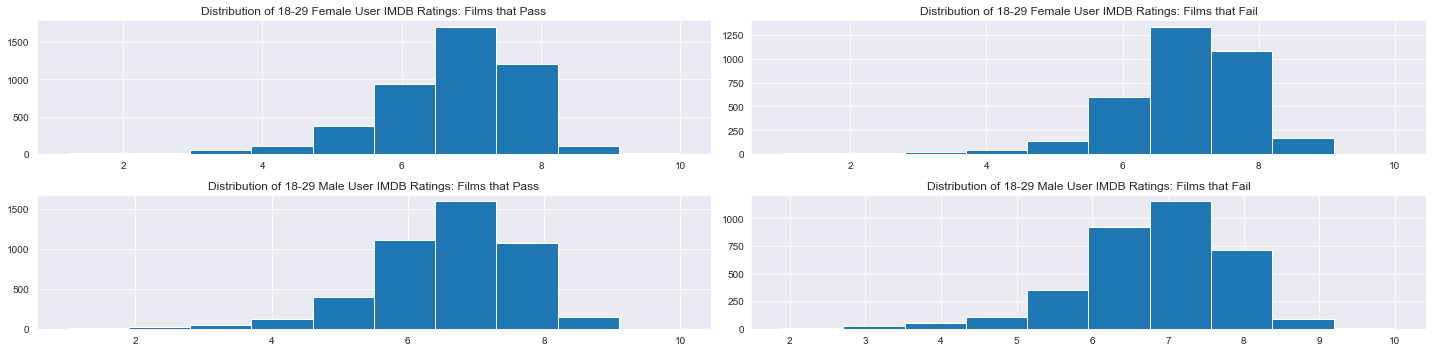

In [8]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist('females_18age_avg_vote', data= bechdel_pass_imdb)
axs[0,0].set_title('Distribution of 18-29 Female User IMDB Ratings: Films that Pass')
axs[0,1].hist('females_18age_avg_vote', data= bechdel_fail_imdb)
axs[0,1].set_title('Distribution of 18-29 Female User IMDB Ratings: Films that Fail')
axs[1,0].hist('males_18age_avg_vote', data= bechdel_pass_imdb)
axs[1,0].set_title('Distribution of 18-29 Male User IMDB Ratings: Films that Pass')
axs[1,1].hist('males_18age_avg_vote', data= bechdel_fail_imdb)
axs[1,1].set_title('Distribution of 18-29 Male User IMDB Ratings: Films that Fail')
plt.tight_layout()
plt.show()

18-29 year old women are even more likely to rate movies that fail higher than those that pass than women across all agea groups. Men 18-29 show this tendency as well but the distribution is more noticeable with female viewers.  

In [9]:
print('Mean Score Films that Fail Bechdel: Women 18-29')
print(bechdel_fail_imdb['females_18age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Women 18-29')
print(bechdel_pass_imdb['females_18age_avg_vote'].median())
print('Mean Score Films that Fail Bechdel: Men 18-29')
print(bechdel_fail_imdb['males_18age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Men 18-29')
print(bechdel_fail_imdb['males_18age_avg_vote'].median())

Mean Score Films that Fail Bechdel: Women 18-29
7.0
Mean Score Films that Pass Bechdel: Women 18-29
6.8
Mean Score Films that Fail Bechdel: Men 18-29
6.9
Mean Score Films that Pass Bechdel: Men 18-29
6.9


Medians not significantly higher, though women of this age group do have a slightly higher median score for movies that fail vs. pass.

<b>Viewers 30-44</b>

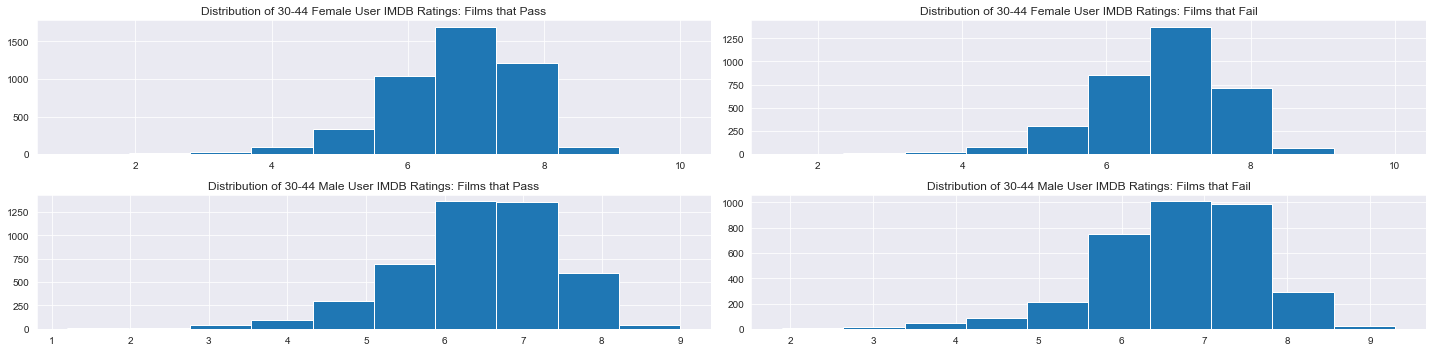

In [10]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist('females_30age_avg_vote', data= bechdel_pass_imdb)
axs[0,0].set_title('Distribution of 30-44 Female User IMDB Ratings: Films that Pass')
axs[0,1].hist('females_30age_avg_vote', data= bechdel_fail_imdb)
axs[0,1].set_title('Distribution of 30-44 Female User IMDB Ratings: Films that Fail')
axs[1,0].hist('males_30age_avg_vote', data= bechdel_pass_imdb)
axs[1,0].set_title('Distribution of 30-44 Male User IMDB Ratings: Films that Pass')
axs[1,1].hist('males_30age_avg_vote', data= bechdel_fail_imdb)
axs[1,1].set_title('Distribution of 30-44 Male User IMDB Ratings: Films that Fail')
plt.tight_layout()
plt.show()

Here we see a difference. It seems that women aged 30-44 are more likely to rate movies that pass higher than those that fail, while men in this age group tend to rate movies that fail slightly higher. 

In [11]:
print('Mean Score Films that Fail Bechdel: Women 30-44')
print(bechdel_fail_imdb['females_30age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Women 30-44')
print(bechdel_pass_imdb['females_30age_avg_vote'].median())
print('Mean Score Films that Fail Bechdel: Men 30-44')
print(bechdel_fail_imdb['males_30age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Men 30-44')
print(bechdel_fail_imdb['males_30age_avg_vote'].median())

Mean Score Films that Fail Bechdel: Women 30-44
6.8
Mean Score Films that Pass Bechdel: Women 30-44
6.8
Mean Score Films that Fail Bechdel: Men 30-44
6.8
Mean Score Films that Pass Bechdel: Men 30-44
6.8


Medians, however are identical across both genders.

<b>Viewers 45+</b>

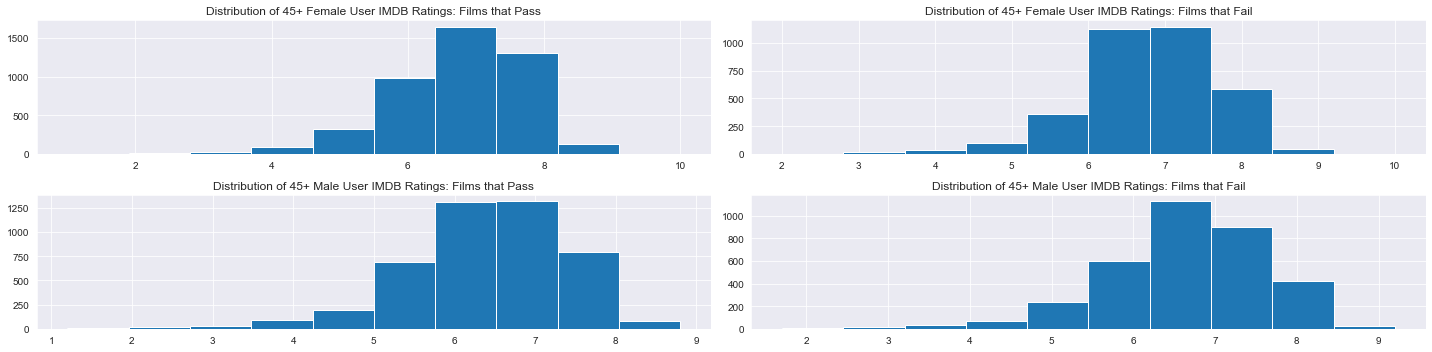

In [12]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist('females_45age_avg_vote', data= bechdel_pass_imdb)
axs[0,0].set_title('Distribution of 45+ Female User IMDB Ratings: Films that Pass')
axs[0,1].hist('females_45age_avg_vote', data= bechdel_fail_imdb)
axs[0,1].set_title('Distribution of 45+ Female User IMDB Ratings: Films that Fail')
axs[1,0].hist('males_45age_avg_vote', data= bechdel_pass_imdb)
axs[1,0].set_title('Distribution of 45+ Male User IMDB Ratings: Films that Pass')
axs[1,1].hist('males_45age_avg_vote', data= bechdel_fail_imdb)
axs[1,1].set_title('Distribution of 45+ Male User IMDB Ratings: Films that Fail')
plt.tight_layout()
plt.show()

Older viewers of both genders seem slightly more likely to rate passing movies highly. 

In [13]:
print('Mean Score Films that Fail Bechdel: Women 45+')
print(bechdel_fail_imdb['females_45age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Women 45+')
print(bechdel_pass_imdb['females_45age_avg_vote'].median())
print('Mean Score Films that Fail Bechdel: Men 45+')
print(bechdel_fail_imdb['males_45age_avg_vote'].median())
print('Mean Score Films that Pass Bechdel: Men 45+')
print(bechdel_fail_imdb['males_45age_avg_vote'].median())

Mean Score Films that Fail Bechdel: Women 45+
6.9
Mean Score Films that Pass Bechdel: Women 45+
6.8
Mean Score Films that Fail Bechdel: Men 45+
6.7
Mean Score Films that Pass Bechdel: Men 45+
6.7


Across all age groups and genders, ratings are not significantly different for movies that fail vs. pass. 

<b>IMDB Ratings and Film Genre
<p>Which genres have the highest average IMDB ratings?</p></b>
<p>Primary Genre Listed</p>

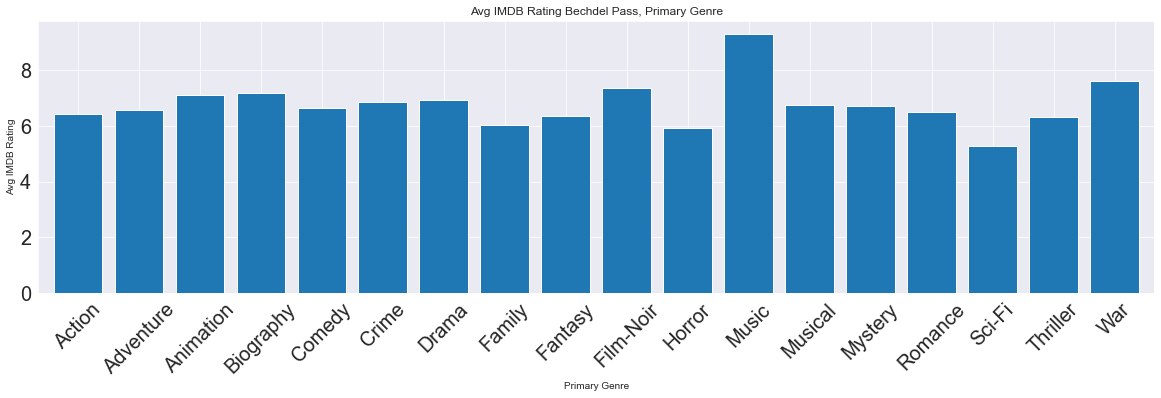

In [14]:
genre1 = bechdel_pass_imdb.groupby(['genre1'])['mean_vote'].mean()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
genre1.plot.bar(width=0.8)
plt.xticks(rotation=45)
plt.ylabel('Avg IMDB Rating')
plt.xlabel('Primary Genre')
plt.title('Avg IMDB Rating Bechdel Pass, Primary Genre')
plt.show()


The highest rated IMDB films, on average, have the first listed genre as "Music" meaning films about music, such as "Soul" or "A Star is Born." Film-Noir and War movies are also highly rated on average.

Secondary Genre Listed

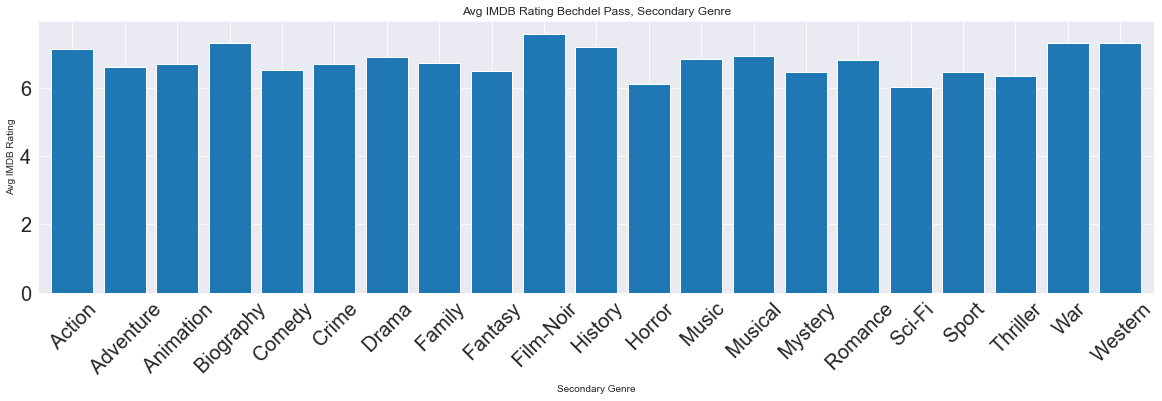

In [15]:
genre2 = bechdel_pass_imdb.groupby(['genre2'])['mean_vote'].mean()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
genre2.plot.bar(width=0.8)
plt.xticks(rotation=45)
plt.ylabel('Avg IMDB Rating')
plt.xlabel('Secondary Genre')
plt.title('Avg IMDB Rating Bechdel Pass, Secondary Genre')
plt.show()

When looking at the secondary genre listed, the ratings are much more even, but Film-Noir seems to be the winner. Also very popular: Biography, History, War, and Western.

Tertiary Genre

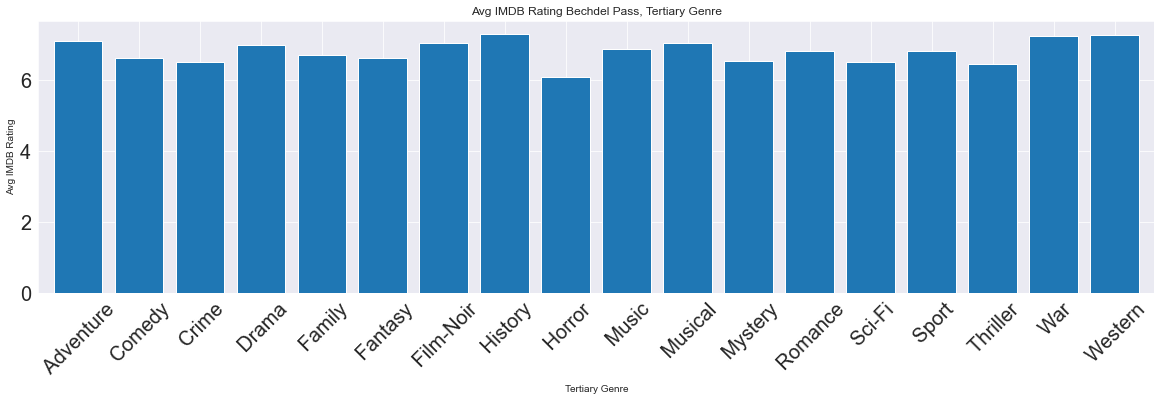

In [16]:
genre3 = bechdel_pass_imdb.groupby(['genre3'])['mean_vote'].mean()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
genre3.plot.bar(width=0.8)
plt.xticks(rotation=45)
plt.ylabel('Avg IMDB Rating')
plt.xlabel('Tertiary Genre')
plt.title('Avg IMDB Rating Bechdel Pass, Tertiary Genre')
plt.show()

Looking at tertiary genre, History, War, and Western genres are the most popular. 

<b>Conclusions:</b>
<p>Films in the genres of Music, Film-Noir, War, Western, and Biography tend to be the most highly rated by IMDB users. These are the genres (and combinations thereof) we will focus on when reviewing scripts.

<b>Directors with Highly Rated Films</b>
<p>Here we are only looking at directors for films that pass the Bechdel Test made in 1990 or later.</p>

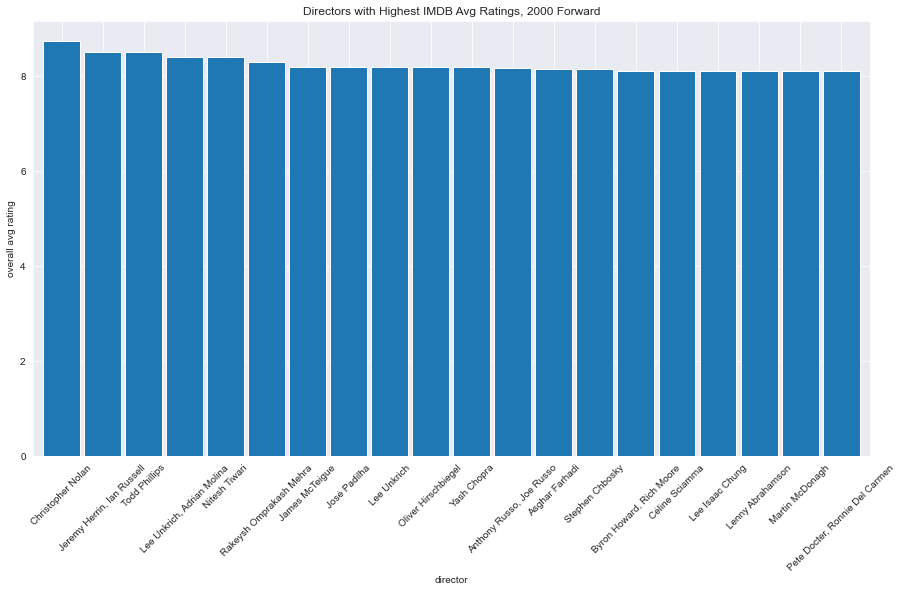

In [20]:
bechdel_pass_budget = bechdel_imdb_budget[bechdel_imdb_budget['bechdel_test'] == 'PASS']
bechdel_imdb_director = bechdel_pass_budget[bechdel_pass_budget['year']>=2000]
d_imdb = bechdel_imdb_director.groupby(['director'])['mean_vote'].mean().nlargest(20)
d_imdb.plot(kind='bar', title='Directors with Highest IMDB Avg Ratings, 2000 Forward', ylabel='overall avg rating',
         xlabel='director', figsize=(15, 8), width=0.9)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=45)
plt.show()

Very little difference in average ratings, even when I extend to the top 50.

<b>What about Writers?</b>

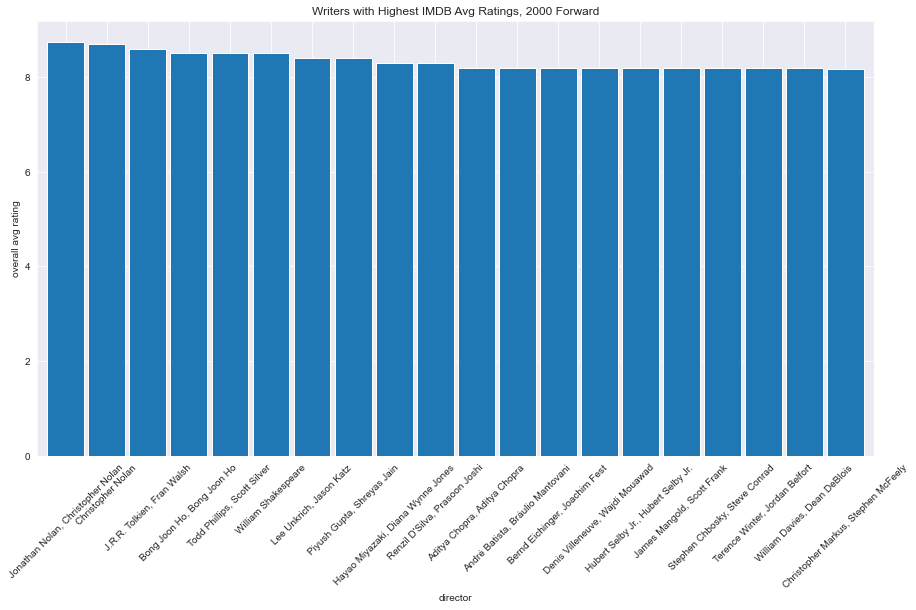

In [21]:
bechdel_pass_budget = bechdel_imdb_budget[bechdel_imdb_budget['bechdel_test'] == 'PASS']
bechdel_imdb_director = bechdel_pass_budget[bechdel_pass_budget['year']>=2000]
d_imdb = bechdel_imdb_director.groupby(['writer'])['mean_vote'].mean().nlargest(20)
d_imdb.plot(kind='bar', title='Writers with Highest IMDB Avg Ratings, 2000 Forward', ylabel='overall avg rating',
         xlabel='director', figsize=(15, 8), width=0.9)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=45)
plt.show()

Average Ratings also differ only very slightly with the top writers. 

<b>Insights Based on IMDB Ratings</b>

<b>User Ratings by Gender:</b>
    <ul>
    <li>There does not appear to be a significant difference between user ratings of movies that pass vs. movies that fail the Bechdel Test, regardless of gender or age group. </li>
</ul>
<b>User Ratings by Genre</b>
<ul>
    <li>Based on primary genre, films about Music (like "A Star is Born" or "The Sound of Metal") are the most highly rated on average. Film Noir and War movies are also highly rated</li>
    <li>Based on secondary and tertiary listed genre, History, Biography, and Western films should also be on our list in terms of reading scripts</li>
</ul>

<b>User Ratings by Director</b>
<ul>
    <li>There are not any significant differences between average user ratings of the top 20 directors by average ratings</li></ul>
    <b>Generalizations</b>
    <ul>
    <li>Overall, user Bechdel test pass/fail is not a significant factor in IMDB user ratings. There is some general preference by genre, but it is slight</li>
    <li>Directors seem not to factor in much at all, at least amongst the most popular, even amongst the top 50</li>
    <li>Similar results with directors</li>
    <li>Generally speaking, the box office gross and profit margin numbers will be better indications of successful movies</li>
</ul>
    
    